# DB Analysis
## With a few hundred papers in the DB, some experiments can be done on the data.


### 1. Connecting to the DB

In [1]:
import mariadb
import json

In [2]:
with open('../credentials.json', 'r') as crd_json_fd:
    json_text = crd_json_fd.read()
    json_obj = json.loads(json_text)

In [3]:
credentials = json_obj["Credentials"]
username = credentials["username"]
password = credentials["password"]

In [4]:
table_name = "publications"
db_name = "ubbcluj"

In [5]:
mariadb_connection = mariadb.connect(user=username, password=password, database=db_name)
mariadb_cursor = mariadb_connection.cursor()

### 2. Counting publications.

In [13]:
queryString = "SELECT COUNT(*) FROM "
queryString += table_name

In [14]:
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)


In [15]:
for item in mariadb_cursor:
    count = item[0]
    print("Number of publications: {0}".format(count))
    

Number of publications: 495


### 3. Distinct Affiliations

In [18]:
queryString = "SELECT Affiliations, COUNT(*) AS c FROM publications GROUP BY Affiliations ORDER BY c DESC"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

affiliations = []
for item in mariadb_cursor:
    Affiliation = item[0]
    affiliations.append(item[0])
    c = item[1]
    print("{0} : {1} occurences".format(Affiliation, c))

 : 176 occurences
Studia Universitas Babes-Bolyai : 13 occurences
Studia Universitatis "Babes-Bolyai" : 13 occurences
Studia Universitatis Babeș-Bolyai Series Informatica : 8 occurences
International Journal of Computers : 7 occurences
Proceedings of the Symposium Colocviul Academic Clujean de INFORMATICA : 6 occurences
Zilele Academice Clujene (ZAC) : 5 occurences
Studies in Informatics and Control : 4 occurences
Knowledge Engineering: Principles and Techniques : 4 occurences
The Genetic and Evolutionary Computation Conference : 3 occurences
International Journal on Artificial Intelligence Tools (IJAIT) : 2 occurences
Applied Soft Computing : 2 occurences
The International Journal of Information Technology and Intelligent Computing : 2 occurences
EuroGP2006 & EvoCOP2006 : 2 occurences
Acta Universitatis Apulensis : 2 occurences
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics : 2 occurences
the 2016 IEEE 12th International Conference on Intelligent Comp

In [20]:
for i in affiliations:
    if "conference" in [k.lower() for k in i.split()]:
        print(i)

The Genetic and Evolutionary Computation Conference
MECO45 45th Conference of the Middle European Cooperation in Statistical Physics
the 2016 IEEE 12th International Conference on Intelligent Computer Communication and Processing
2008 IEEE-TTTC International Conference on Automation
The 25th International Conference on Software, Telecommunications and Computer Networks (SoftCOM)
International Conference on Next Generation Web Services Practices (NWeSP)
2nd International Conference on Intelligent Computer Communication and Processing (ICCP)
The 19th International Conference on Artificial Intelligence and Soft Computing 
GECCO 2019 (Proceedings of the Genetic and Evolutionary Computation Conference Companion
KES 2019 (Proceedings of the 23rd International Conference on Knowledge-Based and Intelligent Information Engineering Systems
ICSOFT 2019 (The 14th International Conference on Software Technologies (ICSOFT 2019)
SEKE 2019 (Proc. of the 31st International Conference on Software Engine

In [21]:
for i in affiliations:
    if "journal" in [k.lower() for k in i.split()]:
        print(i)

International Journal of Computers
International Journal on Artificial Intelligence Tools (IJAIT)
The International Journal of Information Technology and Intelligent Computing
Journal of chemical information and computer sciences 40 (4), 1052-1061
INFOCOMP Journal of Computer Science
Journal of Artificial Evolution and Applications
Journal of chemical information and computer sciences 42 (6), 1363-1369
Journal of chemical information and computer sciences 36 (3), 465-482
Journal of chemical information and computer sciences 37 (3), 510-516
Journal of chemical information and computer sciences 36 (6), 1098-1108
Journal of chemical information and computer sciences 35 (5), 851-857
International Journal of Computer Information Systems and Industrial …
International Journal of Innovative Computing Information and Control
International Journal of Innovative Computing
Journal of Systems and Software
IJCSNS International Journal of Computer Science and Network Security
IJCTA - International J

In [23]:
tokens = []
for i in affiliations:
    words = i.split()
    for word in words:
        tokens.append(word)
tokens

['Studia',
 'Universitas',
 'Babes-Bolyai',
 'Studia',
 'Universitatis',
 '"Babes-Bolyai"',
 'Studia',
 'Universitatis',
 'Babeș-Bolyai',
 'Series',
 'Informatica',
 'International',
 'Journal',
 'of',
 'Computers',
 'Proceedings',
 'of',
 'the',
 'Symposium',
 'Colocviul',
 'Academic',
 'Clujean',
 'de',
 'INFORMATICA',
 'Zilele',
 'Academice',
 'Clujene',
 '(ZAC)',
 'Studies',
 'in',
 'Informatics',
 'and',
 'Control',
 'Knowledge',
 'Engineering:',
 'Principles',
 'and',
 'Techniques',
 'The',
 'Genetic',
 'and',
 'Evolutionary',
 'Computation',
 'Conference',
 'International',
 'Journal',
 'on',
 'Artificial',
 'Intelligence',
 'Tools',
 '(IJAIT)',
 'Applied',
 'Soft',
 'Computing',
 'The',
 'International',
 'Journal',
 'of',
 'Information',
 'Technology',
 'and',
 'Intelligent',
 'Computing',
 'EuroGP2006',
 '&',
 'EvoCOP2006',
 'Acta',
 'Universitatis',
 'Apulensis',
 'MECO45',
 '45th',
 'Conference',
 'of',
 'the',
 'Middle',
 'European',
 'Cooperation',
 'in',
 'Statistical',


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


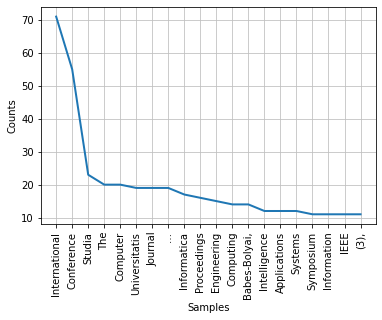

In [29]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    #print(str(key) + ':' + str(val))
    pass
freq.plot(20, cumulative=False)

### 3. TF-IDF and K-Means?


### 3. Distinct Affiliations

In [34]:
queryString = "SELECT Title FROM publications"
try:
    mariadb_cursor.execute(queryString)
except Exception as ex:
    print(ex)

titles = []
for item in mariadb_cursor:
    Title = item[0]
    titles.append(item[0])

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
corpus = titles[:]
corpus

['A Comparative Study of Software Architectures in Mobile Applications',
 'The Use of Simple Cellular Automata in Image Processing',
 'Support Vector Machine and Boosting based Multiclass Classification for Traffic Scene Obstacles',
 'Obstacle Recognition in Traffic by Adapting the HOG Descriptor and Learning in Layers',
 'Descriptors fusion and genetic programming for breast cancer detection',
 'Multi-objective breast cancer classification by using Multi-Expression Programming',
 'Pedestrian Recognition by Using Kernel Descriptors',
 'Improving classification performance of Support Vector Machine by genetically optimisation of kernel shape and hyper-parameters',
 'How the Kernels Can Influence Image Classification Performance',
 'Alignment of Custom Standards by Machine Learning Algorithms',
 'Model Alignment by Using the Concept Definition',
 'Evolutionary design of Evolutionary Algorithms',
 'Genetic Programming with linear representation – a survey',
 'An autonomous GP-based system

In [70]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [71]:
print(vectorizer.get_feature_names())

['10', '17th', '1985', '1996', '1999', '2007', '2009', '2014', '2015', '3d', 'abordari', 'about', 'academic', 'accelerate', 'acceleration', 'accelerometer', 'access', 'according', 'accurate', 'acknowledgement', 'aco', 'acquired', 'acrylonitrile', 'action', 'active', 'activitatii', 'activities', 'activity', 'actuala', 'adapting', 'adaptive', 'additional', 'administration', 'advanced', 'agent', 'agenti', 'agentilor', 'agents', 'aggregated', 'aggregation', 'agile', 'algorithm', 'algorithmic', 'algorithms', 'algoritmi', 'alignement', 'aligning', 'alignment', 'alteration', 'alterations', 'american', 'an', 'anal', 'analogy', 'analysing', 'analysis', 'analytics', 'analyze', 'ancient', 'and', 'android', 'answer', 'ant', 'antioxidant', 'ants', 'ap041', 'aplicati', 'aplicatii', 'aplicatiile', 'aport', 'applicability', 'application', 'applications', 'applied', 'applying', 'apport', 'appraisal', 'apprentissage', 'approach', 'approaches', 'approche', 'architecture', 'architectures', 'are', 'arrest'

In [72]:
print(X.shape)

(495, 1124)


In [73]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [74]:
for k in X.toarray():
    for j in k:
        if j > 1:
            print(j)

2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [76]:
import pandas as pd

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(use_idf=False, norm='l1')
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

,10,17th,1985,1996,1999,2007,2009,2014,2015,3d,...,workbench,workflow,wrist,writing,wyliodrin,xml,year,zsuzsanna,évolutive,în
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)
matrix = vec.fit_transform(corpus)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbodi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,'inteligenta,1,10,17th,1985–1996,1999,1999-molecular,2-4,2007,2009,...,year,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vec.fit_transform(corpus)
df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
df

c:\users\tbodi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yours

,'inteligenta,1,10,17th,1985–1996,1999,1999-molecular,2-4,2007,2009,...,year,zsuzsanna,évolut,în,β-x,–,’,“,”,…
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
for word in df.columns:
    for row in df[word]:
        if row != 0.0:
            print(row)

0.3812637753306267
0.5434940441646108
0.5214335478203574
0.6038531075510472
0.32914617788207995
0.2989052664646076
0.2695032428471318
0.2695032428471318
0.3148101712953743
0.4318451227125261
0.6296203425907486
0.5448176610889562
0.5448176610889562
0.3724182909804794
0.46235576926605115
0.36472321970911414
0.3314246487735438
0.30594924509787547
0.5350838376517454
0.4120700140540922
0.4467049641774702
0.40256593114927375
0.30686289686071616
0.45960914572411193
0.3601748679678963
0.48129087829074924
0.3865352337071557
0.41222058740882944
0.489897850006813
0.4324646069729114
0.41228839659005706
0.23103850399884912
0.36502268433793833
0.24564198191988443
0.38417202178789883
0.30309376417002265
0.334672607610936
0.32182580902575264
0.3335161700845128
0.3379437900296541
0.36376298222150116
0.3268972416705251
0.32680593005335495
0.3513861146622607
0.4569888427180535
0.4615035704183332
0.4802057555221127
0.596484400831269
0.5405610112966447
0.36910493208292294
0.44573895693769366
0.484335948628

0.39419708261995323
0.380037681901306
0.46235576926605115
0.4364948695088578
0.42569394823591217
0.4492186534749474
0.3689531771004724
0.5398062964991928
0.3689531771004724
0.4627078612392703
0.5417496158819746
0.4393699710656577
0.5575644316421142
0.5100948233013327
0.4873122646133685
0.5093848691668357
0.2757808657236144
0.5088688711827501
0.29104812890749454
0.298572095036245
0.30572558515941645
0.370198444110038
0.4796128533966735
0.4142048574349236
0.5638387827018855
0.4211460981575282
0.31698053969428713
0.42706826083507976
0.2700080074632201
0.5138816885010318
0.4918077906727502
0.40503449493858923
0.4104678646497516
0.36682044273200365
0.4676318314124529
0.4654029098630104
0.44097646298109133
0.3557365024195836
0.3096056269300373
0.3288092874536527
0.4417010291954038
0.39789681452430004
0.4873122646133685
0.4487749292116217
0.3724182909804794
0.6363698836968084
0.4324646069729114
0.475362588979069
0.45669099188427664
0.4441245824921326
0.25909190874606597
0.49348660794602806
0.

0.25755509119565895
0.24938401861454512
0.26958378069558914
0.27782214869620087
0.23393986345555318
0.2980053492980487
0.2512267175944562
0.2928388880720965
0.283805016866647
0.2949221726695528
0.21711529659956963
0.32970182974180606
0.2869860657411153
0.2924133458907049
0.31065677539971853
0.2516333929556997
0.4831628925863942
0.3856297826868055
0.4181604900228326
0.42257323563826843
0.3754453568720482
0.4151847305736737
0.44601353695651574
0.4258117457769117
0.3158147114080506
0.23566187866263474
0.291539186670806
0.45267028603979187
0.4526702860397918
0.3660505260562525
0.33303512621323145
0.3453971876920391
0.29153579161312676
0.43031117339961883
0.4622249183968559
0.3902669753701819
0.38210174995981844
0.340513191943544
0.340513191943544
0.3013973321118706
0.3101679151708378
0.3146544393324939
0.3448402314452295
0.3564973040150317
0.3981457546388382
0.2731340119807217
0.3241114815821611
0.31923884492304383
0.5587878311078691
0.5587878311078691
0.39612003531328593
0.470418894371956

In [108]:
from sklearn.cluster import KMeans

In [113]:
number_of_clusters = 10

In [114]:
km = KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(n_clusters=10)

In [115]:
km.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [116]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: compon fuzzi select problem classif
Cluster 1: cellular automata rule imag predict
Cluster 2: cluster softwar use fuzzi hierarch
Cluster 3: align approach use automat q-learn
Cluster 4: genet program kernel algorithm svm
Cluster 5: web analysi educ formal puls
Cluster 6: evolutionari collabor search complex structur
Cluster 7: intellig manag distribut multi-ag knowledg
Cluster 8: network model base use learn
Cluster 9: solv sensit problem optim ant


In [117]:
results = pd.DataFrame({
    'corpus': corpus,
    'category': km.labels_
})

In [130]:
results.sort_values('category')
for k in results.sort_values('category').values:
    print(k[1], " --- ", k[0])

0  ---  L. Computational intelligence-based model for component composition. In International Conference on Computers
0  ---  Evolutionary algorithms for the component selection problem
0  ---  Selecting and optimally combining the systems of solvents in the thin film cromatography using the fuzzy sets theory
0  ---  Degenerate and non-degenerate convex decomposition of finite fuzzy partitions—I
0  ---  A new component selection algorithm based on metrics and fuzzy clustering analysis
0  ---  Principal components analysis based on a fuzzy sets approach
0  ---  Classical and fuzzy principal component analysis of some environmental samples concerning the pollution with heavy metals
0  ---  A fuzzy classification of the chemical elements
0  ---  Soft computing approaches on the bandwidth problem
0  ---  A new fuzzy regression algorithm
0  ---  Principal component analysis versus fuzzy principal component analysis: a case study: the quality of Danube water (1985–1996)
0  ---  iCOMPONENT: A